1.3.1
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.

5.385164807134504
28.999999999999996
4.0
3
5.744562646538029
33.0
5.0
3
5.0990195135927845
25.999999999999996
4.0
3
4.242640687119285
17.999999999999996
4.0
3
4.123105625617661
17.0
4.0
2
5.916079783099616
35.0
5.0
3


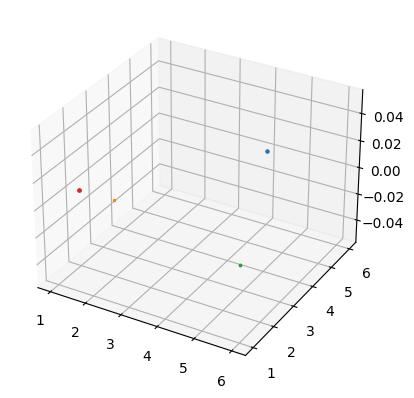

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as plt3d
import random


fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
o = [np.array([random.randint(1,6),random.randint(1,6),random.randint(1,6)]) for i in range(4)]
for i in o:
    plt.scatter(i[0],i[1],i[2])

n = 1
for i in o[:3]:
    for j in o[n:]:
        print (np.linalg.norm(i-j)) #Расстояние Евклида
        print (np.linalg.norm(i-j)**2)  #Квадрат расстояния Евклида
        print (np.linalg.norm(i-j,ord = np.inf)) #Расстояние Чебышева
        sm = (np.nonzero(i-j))
        sm = np.shape(sm[0])[0] #Расстояние Хемминга
        print(sm)
    n += 1
plt.show()

2.3.1
Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

KNeighborsClassifier()
(-2,-2) is class
[0]
(1,3) is class
[1]
accuracy: 0.957


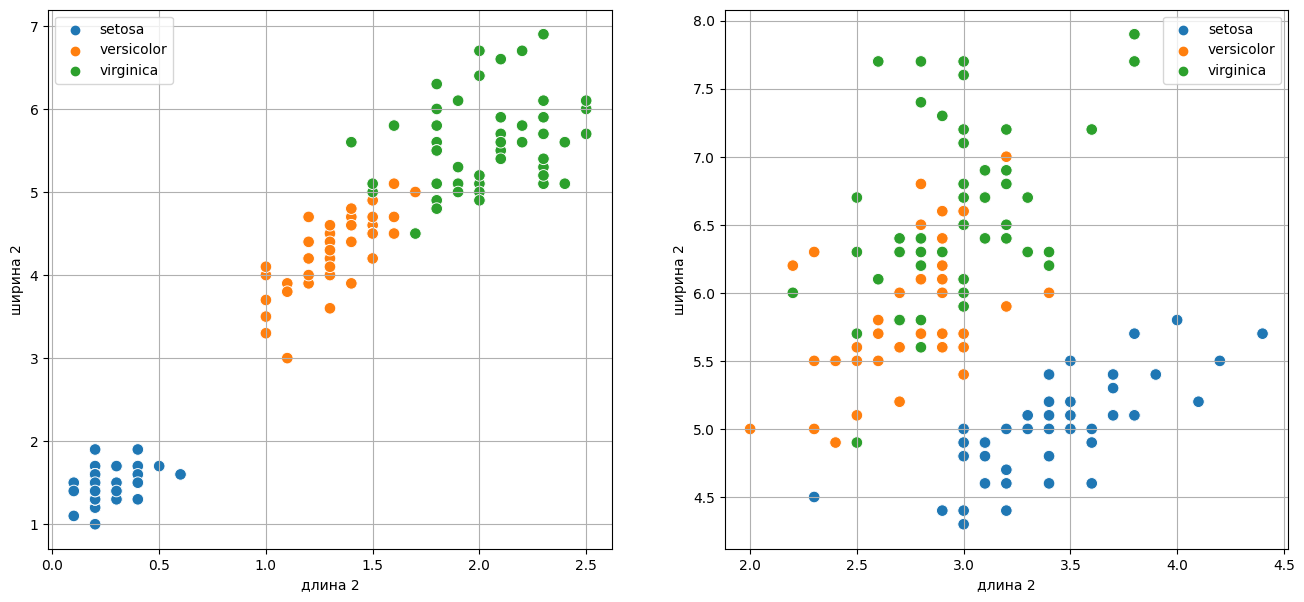

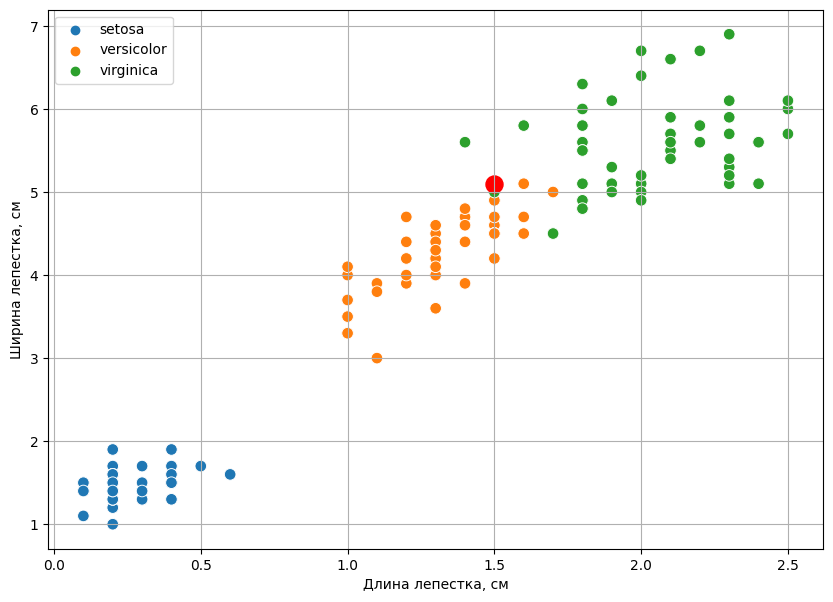

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


# данные
X = np.array ([[-1,-1], [-2,-1], [-3,-2], [1, 1] , [2,1], [3,2]])
target = [0,0,0,1,1,1]

# обучаем модель k-ближайших соседей к данным 
K = 5 # K = 1,5,10
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X, target)
print (model)

#делайем прогноз 
print ('(-2,-2) is class'),
print ( model.predict([[-2,-2]]))

print('(1,3) is class'),
print( model.predict([[1,3]]))

import seaborn as sns
import matplotlib.pyplot as plt

iris =sns.load_dataset('iris')
iris
plt.figure(figsize=(16,7))

plt.subplot(121)
sns.scatterplot(data=iris,x ='petal_width',y='petal_length',hue = 'species',s = 70)
plt.xlabel('длина 2')
plt.ylabel('ширина 2')
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(data=iris,x ='sepal_width',y='sepal_length',hue = 'species',s = 70)
plt.xlabel('длина 2')
plt.ylabel('ширина 2')
plt.legend()
plt.grid()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1],iris.iloc[:, -1],test_size = 0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()
y_train.head()
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")
plt.legend(loc=2)
plt.grid()
for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]: # то подсвечиваем точку красным
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')



3.3.2 Задание
Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [1]:
from sklearn.feature_extraction import DictVectorizer
import pandas as pd

data_dict = [{"красный":2,"синий":4},
             {"красный":3,"синий":2},
             {"красный":1,"синий":1}]
dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
features


array([[2., 4.],
       [3., 2.],
       [1., 1.]])